In [2]:

import pandas as pd
import numpy as np
from datetime import date

#import matplotlib.pylab as plot
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, YearLocator, DateFormatter

In [3]:
start_date = '2008-01-01'

In [4]:
oil_futures_path = 'https://www.eia.gov/dnav/pet/hist_xls/RCLC1d.xls'
oil_prices_path = 'https://www.eia.gov/dnav/pet/hist_xls/RBRTEd.xls'
diesel_prices_path = 'https://www.eia.gov/dnav/pet/xls/PET_PRI_GND_DCUS_NUS_W.xls'

In [5]:
oil_futures = pd.read_excel(oil_futures_path,
                           sheet_name='Data 1',
                           skiprows=4,
                           names=['SpotDate', 'SpotPrice'])

oil_prices = pd.read_excel(oil_prices_path,
                           sheet_name='Data 1',
                           skiprows=4,
                           names=['PriceDate', 'Price'])

diesel_prices = pd.read_excel(diesel_prices_path,
                             sheet_name='Data 1',
                             skiprows=2,
                             index_col=None,
                             usecols=[0,6],
                             names=['PriceDate', 'DieselRegularPrice']
                            ).dropna()

In [6]:
diesel_prices

,PriceDate,DieselRegularPrice
223,1994-11-28,1.149
224,1994-12-05,1.169
225,1994-12-12,1.167
226,1994-12-19,1.167
227,1994-12-26,1.165
...,...,...
1592,2021-02-22,2.815
1593,2021-03-01,2.899
1594,2021-03-08,2.961
1595,2021-03-15,3.044


In [7]:
oil_futures = oil_futures[(oil_futures.SpotDate.apply(
    lambda x: pd.Timestamp(x).date()) >= pd.Timestamp(start_date).date())]

oil_prices = oil_prices[(oil_prices.PriceDate.apply(
    lambda x: pd.Timestamp(x).date()) >= pd.Timestamp(start_date).date())]

gas_prices = diesel_prices[(diesel_prices.PriceDate.apply(
    lambda x: pd.Timestamp(x).date()) >= pd.Timestamp(start_date).date())]

In [76]:
gas_prices

,PriceDate,DieselRegularPrice
907,2008-01-07,3.154
908,2008-01-14,3.123
909,2008-01-21,3.072
910,2008-01-28,3.026
911,2008-02-04,3.002
...,...,...
1592,2021-02-22,2.815
1593,2021-03-01,2.899
1594,2021-03-08,2.961
1595,2021-03-15,3.044


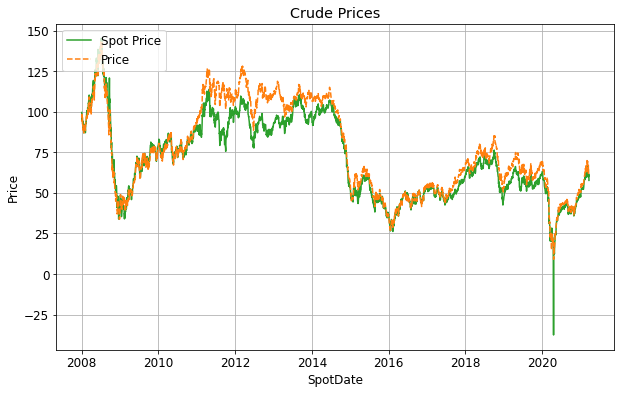

In [77]:
#fig = plt.figure()
fig, ax = plt.subplots(figsize=(10, 6))
plt.rc('font', size=12)
ax.plot(oil_futures['SpotDate'],
            oil_futures['SpotPrice'],
            color='tab:green', 
            label='Spot Price'
        )
ax.set_xlabel('SpotDate')
ax.set_ylabel('Price')
ax.grid(True)
ax.legend(loc='upper left')

ax.plot(oil_prices['PriceDate'], 
        oil_prices['Price'], 
        color='tab:orange', 
        linestyle='--',
        label='Price')
ax.set_title('Crude Prices')
ax.legend(loc='upper left')

ax.legend(loc='upper left')

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Diesel Prices')

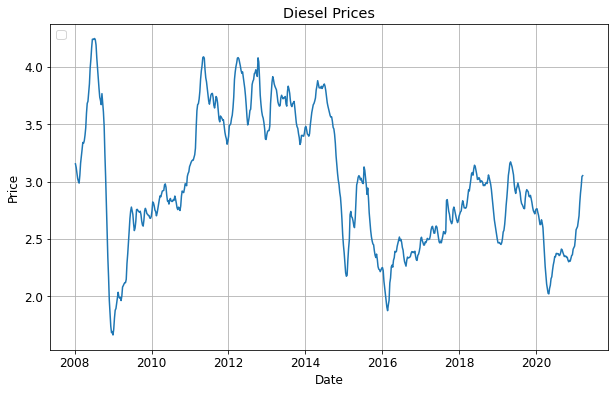

In [78]:
fig, ax2 = plt.subplots(figsize=(10, 6))
plt.rc('font', size=12)

ax2.set_xlabel('Date')
ax2.set_ylabel('Price')
ax2.grid(True)
ax2.legend(loc='upper left')

ax2.plot(gas_prices['PriceDate'], 
        gas_prices['DieselRegularPrice'], 
        color='tab:blue', 
        linestyle='-',
        label='Price')
ax2.set_title('Diesel Prices')

In [8]:
historical_mean = oil_prices.mean(numeric_only=True)
trumps = oil_prices[(oil_prices.PriceDate >= '2017-01-24') & (oil_prices.PriceDate < '2021-01-24')]
tm = trumps.mean(numeric_only=True)
print('Trump', tm)
print('Historical', historical_mean)


Trump Price    57.901922
dtype: float64
Historical Price    76.19442
dtype: float64


In [9]:
oil_prices.head()

,PriceDate,Price
5244,2008-01-02,97.01
5245,2008-01-03,98.45
5246,2008-01-04,96.87
5247,2008-01-07,94.19
5248,2008-01-08,96.37


In [10]:
bidens = oil_prices[(oil_prices.PriceDate >= '2021-01-24')]
bm = bidens.mean(numeric_only=True)
bm

Price    63.081707
dtype: float64

In [11]:
((bm - tm) / tm) * 100

Price    8.945792
dtype: float64